In [85]:
import os
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
import nltk
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
def get_file_size(path,filename):
  pathname = os.path.join(path,filename)
  size = os.path.getsize(pathname)
  # print(size, "bytes")
  return size

In [31]:
get_file_size("","attention.txt")

2420

In [73]:
def load_data(folder):
  """
    Input : folder name
    output : Corpus List
  """
  total_corpus_size = 0
  corpus = []
  for file_data in os.listdir(folder):
    file_data_path = folder+"/"+file_data
    for file in os.listdir(file_data_path):
      file_path = file_data_path+"/"+file
      if file.endswith(".txt"):
        total_corpus_size += get_file_size("",file_path)
        print(file,"File size : ", get_file_size("",file_path)," bytes")
        with open(file_path,"r") as fin:
          str = fin.read()
          print("Open success! ",file)
          str = str.replace("\n"," ")
          corpus.append(str)

  print("Total Corpus Size: ", total_corpus_size, " bytes")
  return corpus

In [41]:
def doc_preprocessing(raw_corpus):
  """
    Input  : document list
    Output : preprocessed data
  """
  tokenizer = RegexpTokenizer(r'\w+')
  en_stop = set(stopwords.words('english'))
  texts = []

  for i in raw_corpus:
    raw = i.lower()
    raw = re.sub(r"[^a-zA-Z0-9]"," ",raw)
    tokens = word_tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    texts.append(stopped_tokens)

  return texts

In [44]:
def doc_term_matrix(processed_data):
  """
    Input  : Processed document
    Output : term dictionary and Document-Term Matrix
  """
  dictionary = corpora.Dictionary(processed_data)
  doc_term_mat = [dictionary.doc2bow(doc) for doc in processed_data]
  return dictionary, doc_term_mat

In [47]:
def built_model(processed_data, number_of_topics, words):
  """
    Input  : processed document, number of topics and number of words with each topic
    Output : return LSA model and word list
  """
  word_list = []
  dictionary, doc_term_mat = doc_term_matrix(processed_data)
  lsamodel = LsiModel(doc_term_mat, num_topics=number_of_topics, id2word = dictionary)
  print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))

  for index, topic in lsamodel.show_topics(formatted=False, num_words= words):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    word_list.append([w[0] for w in topic])

  return lsamodel, word_list

In [48]:
def compute_coherence_values(dictionary, doc_term_mat, processed_doc, stop, start=2, step=3):
  """
    Input   : dictionary : Gensim dictionary
              doc_term_mat : document term matrix
              processed_doc : List of processed data
              stop : Max num of topics
    Output  : model_list : List of LSA models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
  """
  coherence_values = []
  model_list = []
  for number_of_topics in range(start, stop, step):
    model = LsiModel(doc_term_mat, num_topics=number_of_topics, id2word = dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=processed_doc, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [49]:
def plot_graph(processed_doc, start, stop, step):
  dictionary,doc_term_mat = doc_term_matrix(processed_doc)
  model_list, coherence_values = compute_coherence_values(dictionary, doc_term_mat,processed_doc, stop, start, step)

  x = range(start, stop, step)
  plt.plot(x, coherence_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence score")
  plt.legend(("coherence_values"), loc='best')
  plt.show()

In [50]:
def get_word_cloud(word_list):
  #get individual word clouds
  text = ' '.join(word_list).lower()

  #create the wordcloud object
  wordcloud = WordCloud(background_color='white').generate(text)

  #plot the wordcloud object
  plt.imshow(wordcloud, interpolation='bilInear')
  plt.axis('off')
  plt.show()

In [108]:
def plot_wordclouds(word_list):
  plt.figure(figsize=(40, 15))
  j = np.ceil(len(word_list)/4)
  for t in range(len(word_list)):
      i=t+1
      text = ' '.join(word_list[t]).lower()
      wordcloud = WordCloud(background_color='white').generate(text)
      plt.subplot(len(word_list), 1, i).set_title("Topic #" + str(t))
      plt.plot()
      plt.imshow(wordcloud, interpolation='bilInear')
      plt.axis("off")
  plt.show()

In [97]:
corpus = load_data("/content/sample_data/data")
# corpus

fetish.txt File size :  1777  bytes
Open success!  fetish.txt
wolves.txt File size :  1740  bytes
Open success!  wolves.txt
rare.txt File size :  2122  bytes
Open success!  rare.txt
we_dont_talk_anymore.txt File size :  2226  bytes
Open success!  we_dont_talk_anymore.txt
done_for_me.txt File size :  1750  bytes
Open success!  done_for_me.txt
attention.txt File size :  2420  bytes
Open success!  attention.txt
cheap_thrills.txt File size :  1633  bytes
Open success!  cheap_thrills.txt
chandelier.txt File size :  2064  bytes
Open success!  chandelier.txt
snowman.txt File size :  1283  bytes
Open success!  snowman.txt
Total Corpus Size:  17015  bytes


In [98]:
texts = doc_preprocessing(corpus)
texts

[['take',
  'leave',
  'baby',
  'take',
  'leave',
  'know',
  'leave',
  'cause',
  'know',
  'need',
  'ah',
  'look',
  'mirror',
  'look',
  'mirror',
  'baby',
  'see',
  'clearer',
  'wan',
  'na',
  'nearer',
  'ah',
  'surprised',
  'sympathize',
  'ah',
  'deny',
  'appetite',
  'ah',
  'got',
  'fetish',
  'love',
  'push',
  'come',
  'right',
  'back',
  'see',
  'point',
  'blaming',
  'got',
  'fetish',
  'love',
  'push',
  'come',
  'right',
  'back',
  'see',
  'point',
  'blaming',
  'got',
  'fetish',
  'love',
  'got',
  'fetish',
  'love',
  'got',
  'fetish',
  'love',
  'reaching',
  'limit',
  'say',
  'reaching',
  'limit',
  'going',
  'limit',
  'know',
  'quit',
  'ah',
  'something',
  'got',
  'hooked',
  'body',
  'take',
  'twisted',
  'like',
  'origami',
  'ah',
  'surprised',
  'sympathize',
  'ah',
  'deny',
  'appetite',
  'ah',
  'got',
  'fetish',
  'love',
  'push',
  'come',
  'right',
  'back',
  'see',
  'point',
  'blaming',
  'got',
  'feti

In [99]:
dictionary, doc_term_mat = doc_term_matrix(texts)

In [100]:
dictionary, doc_term_mat

(<gensim.corpora.dictionary.Dictionary at 0x7fe2130a6990>,
 [[(0, 1),
   (1, 8),
   (2, 1),
   (3, 2),
   (4, 1),
   (5, 2),
   (6, 4),
   (7, 1),
   (8, 1),
   (9, 1),
   (10, 1),
   (11, 4),
   (12, 1),
   (13, 1),
   (14, 1),
   (15, 3),
   (16, 1),
   (17, 4),
   (18, 2),
   (19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 13),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 13),
   (28, 2),
   (29, 2),
   (30, 1),
   (31, 1),
   (32, 4),
   (33, 3),
   (34, 1),
   (35, 3),
   (36, 2),
   (37, 12),
   (38, 1),
   (39, 2),
   (40, 1),
   (41, 1),
   (42, 3),
   (43, 1),
   (44, 1),
   (45, 1),
   (46, 4),
   (47, 4),
   (48, 1),
   (49, 2),
   (50, 4),
   (51, 1),
   (52, 1),
   (53, 1),
   (54, 5),
   (55, 1),
   (56, 1),
   (57, 1),
   (58, 1),
   (59, 2),
   (60, 2),
   (61, 3),
   (62, 1),
   (63, 1),
   (64, 1),
   (65, 1),
   (66, 1),
   (67, 1),
   (68, 2),
   (69, 1),
   (70, 1),
   (71, 2)],
  [(12, 1),
   (17, 1),
   (37, 4),
   (40, 2),
   (67, 2),
   (68, 2),
   (72, 3),

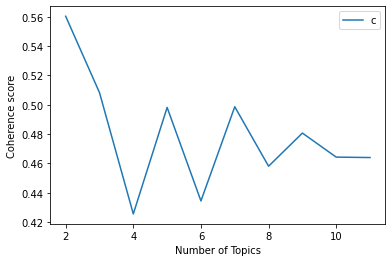

In [101]:
start,stop,step=2,12,1
plot_graph(texts,start,stop,step)

In [104]:
number_of_topics,words = 5,10

document_list = load_data("/content/sample_data/data/")
clean_text = doc_preprocessing(document_list)
model,word_list = built_model(texts,number_of_topics,words)

fetish.txt File size :  1777  bytes
Open success!  fetish.txt
wolves.txt File size :  1740  bytes
Open success!  wolves.txt
rare.txt File size :  2122  bytes
Open success!  rare.txt
we_dont_talk_anymore.txt File size :  2226  bytes
Open success!  we_dont_talk_anymore.txt
done_for_me.txt File size :  1750  bytes
Open success!  done_for_me.txt
attention.txt File size :  2420  bytes
Open success!  attention.txt
cheap_thrills.txt File size :  1633  bytes
Open success!  cheap_thrills.txt
chandelier.txt File size :  2064  bytes
Open success!  chandelier.txt
snowman.txt File size :  1283  bytes
Open success!  snowman.txt
Total Corpus Size:  17015  bytes
[(0, '0.487*"baby" + 0.477*"oh" + 0.240*"love" + 0.186*"tell" + 0.173*"anymore" + 0.166*"tonight" + 0.161*"la" + 0.160*"got" + 0.159*"done" + 0.152*"like"'), (1, '0.392*"baby" + -0.302*"tonight" + 0.266*"oh" + -0.220*"holding" + 0.215*"tell" + -0.212*"one" + -0.194*"love" + 0.193*"done" + -0.184*"three" + -0.184*"two"'), (2, '-0.405*"la" + -0.

In [105]:
model.show_topics()

[(0,
  '0.487*"baby" + 0.477*"oh" + 0.240*"love" + 0.186*"tell" + 0.173*"anymore" + 0.166*"tonight" + 0.161*"la" + 0.160*"got" + 0.159*"done" + 0.152*"like"'),
 (1,
  '0.392*"baby" + -0.302*"tonight" + 0.266*"oh" + -0.220*"holding" + 0.215*"tell" + -0.212*"one" + -0.194*"love" + 0.193*"done" + -0.184*"three" + -0.184*"two"'),
 (2,
  '-0.405*"la" + -0.336*"need" + 0.302*"anymore" + 0.246*"talk" + -0.243*"long" + -0.228*"got" + -0.202*"thrills" + -0.202*"cheap" + 0.180*"like" + 0.172*"oh"'),
 (3,
  '-0.432*"anymore" + -0.360*"talk" + 0.223*"tonight" + -0.216*"love" + 0.212*"one" + 0.208*"two" + 0.208*"three" + 0.197*"doin" + -0.169*"used" + 0.169*"holding"'),
 (4,
  '-0.518*"doin" + -0.311*"knew" + -0.233*"round" + -0.232*"want" + 0.215*"baby" + -0.202*"huh" + -0.155*"runnin" + -0.155*"attention" + -0.154*"got" + -0.142*"know"')]

In [106]:
print(model.show_topic(0, topn=8))
print(model.show_topic(1, topn=8))

[('baby', 0.48653758346857373), ('oh', 0.4769096946719485), ('love', 0.23953522596268068), ('tell', 0.18571163320733203), ('anymore', 0.17338033010413909), ('tonight', 0.16632116581161993), ('la', 0.1605057394092351), ('got', 0.15957014984899134)]
[('baby', 0.39167535060066105), ('tonight', -0.30182231701734274), ('oh', 0.2657080111429062), ('holding', -0.22018649642789495), ('tell', 0.2154094419616925), ('one', -0.21150662899188788), ('love', -0.1935300405917373), ('done', 0.1932823132859799)]


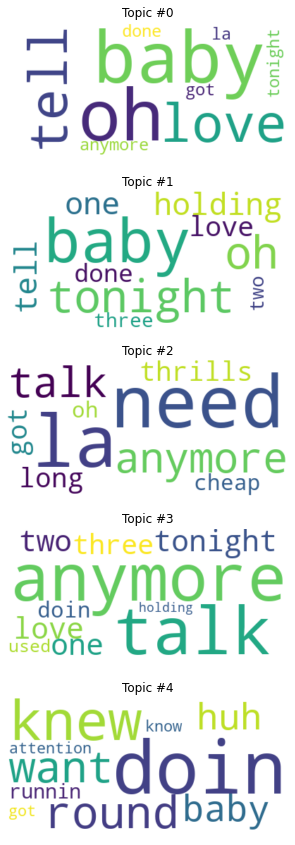

In [109]:
plot_wordclouds(word_list)